In [1]:
import tensorflow as tf
import numpy as np
import sys
sys.path.append('../')
import utils.preprocess as preprocess
import utils.metrics as met

In [2]:
pre = preprocess.preprocess("D:/DataSet/CICIDS2017/CSV/Wednesday-workingHours.pcap_ISCX.csv", labelColumnNabinary_crossentropy)
X_train, X_test, y_train, y_test = pre.preprocessing()

In [3]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [4]:
import utils.network.network9 as model

In [5]:
net = model.MyLstmModel()

In [6]:
algorithm = tf.keras.optimizers.RMSprop(learning_rate=0.01, clipnorm=0.9, rho=0.9, momentum=0.89, epsilon=1e-07, centered=False, name='RMSprop')
net.compile(optimizer=algorithm, loss='binary_crossentropy', metrics=met.ModelMetric("binary_crossentropy").metric()) # categorical_crossentropy

In [7]:
from tensorflow.keras import callbacks
import datetime
dir_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S-network9-RMSprop")
logdir = os.path.join("../tensorboard", dir_name)
tensorboard_callback = callbacks.TensorBoard(logdir, histogram_freq=1)
# lrate = callbacks.LearningRateScheduler(opt_.exp_decay)

In [8]:
import numpy as np
model_ = net.fit(X_train, y_train, epochs=40, batch_size=512, validation_split=0.3, callbacks=[tensorboard_callback], verbose=1) # lrate

al_auc: 0.9965 - val_categorical_accuracy: 0.9689 - val_categorical_crossentropy: 0.1095
Epoch 6/40
663/663 [==============================] - 42s 63ms/step - loss: 0.2737 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 678848.0000 - fn: 339424.0000 - acc: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.9940 - categorical_accuracy: 0.9605 - categorical_crossentropy: 0.1345 - val_loss: 0.2497 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 290936.0000 - val_fn: 145468.0000 - val_acc: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.9970 - val_categorical_accuracy: 0.9717 - val_categorical_crossentropy: 0.1175
Epoch 7/40
663/663 [==============================] - 47s 71ms/step - loss: 0.2746 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 678848.0000 - fn: 339424.0000 - acc: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.9941 - categorical_accuracy: 0.9603 - categorical_crossentropy: 0.1347 - val_loss: 0.2652 - val_tp: 0.0000e+00 - val_f

In [9]:
from utils.evl_metrics import confusion_matrix, eva_metric
y_pred = net.predict(X_test)
y_class = np.argmax(y_pred, axis=1)
y_label = np.argmax(y_test, axis=1)
confusion_matrix(y_label, y_class)
eva_metric(y_label, y_class)


TrueNegatives result:  127273.0
TruePositives result:  74663.0
FalseNegatives result:  1251.0
FalsePositives result:  4624.0
Recall result:  0.9835208
Precision result:  0.94168025


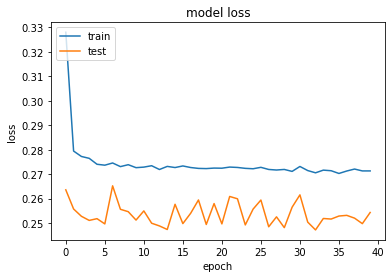

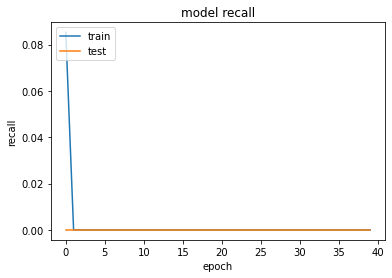

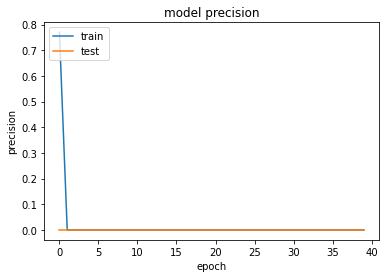

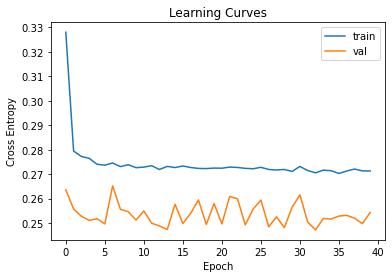

In [10]:
import utils.graph as fig
fig.add_dir(dir_name)
fig.loss_graph(model_,dir_name)
fig.recall_graph(model_,dir_name)
fig.precision_graph(model_,dir_name)
fig.cross_entropy_graph(model_,dir_name)